In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 日本語フォントの設定
plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams['axes.unicode_minus'] = False

In [16]:
read_csv_path = 'ess4-3.csv'
df = pd.read_csv(read_csv_path)
df

,スマホの使用時間(分),睡眠時間(分),身長(cm),足の大きさ(cm),寿司打のスコア
0,120.0,300,152,21.5,3840
1,300.0,420,170,24.0,1700
2,330.0,390,165,26.5,30
3,123.0,420,175,28.5,780
4,480.0,420,175,26.0,1080
...,...,...,...,...,...
83,420.0,420,172,27.0,-300
84,840.0,360,185,28.0,1680
85,441.0,456,161,23.0,60
86,480.0,300,170,26.5,2180


In [27]:
# 全ての列を数値型に変換
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 外れ値の行を削除する関数 (IQR法)
def remove_outliers_iqr(df_temp, column):
    Q1 = df_temp[column].quantile(0.25)
    Q3 = df_temp[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 外れ値のインデックスを取得
    # NaN値は外れ値検出から除外される (quantileがNaNをスキップするため)
    outlier_indices = df_temp[(df_temp[column] < lower_bound) | (df_temp[column] > upper_bound)].index
    return outlier_indices

# 外れ値処理を適用する列 (寿司打のスコアを含む全ての数値列)
columns_to_check_outliers = df.columns.tolist()



# 全ての列で検出された外れ値のインデックスを格納するセット
all_outlier_indices = set()

for col in columns_to_check_outliers:
    # 各列でNaN値を除外してIQRを計算し、外れ値のインデックスを取得
    temp_df_for_iqr = df.dropna(subset=[col])
    outlier_indices_for_col = remove_outliers_iqr(temp_df_for_iqr, col)
    all_outlier_indices.update(outlier_indices_for_col)

# 検出された全ての外れ値の行を元のDataFrameから削除
df_cleaned = df.drop(index=list(all_outlier_indices))
# クレンジング後のデータフレームの確認
df_cleaned



,スマホの使用時間(分),睡眠時間(分),身長(cm),足の大きさ(cm),寿司打のスコア
0,120.0,300,152,21.5,3840
1,300.0,420,170,24.0,1700
2,330.0,390,165,26.5,30
3,123.0,420,175,28.5,780
4,480.0,420,175,26.0,1080
...,...,...,...,...,...
83,420.0,420,172,27.0,-300
84,840.0,360,185,28.0,1680
85,441.0,456,161,23.0,60
86,480.0,300,170,26.5,2180


In [ ]:
# 相関行列の計算
correlation_matrix = df_cleaned.corr()
print("相関行列:")
correlation_matrix.round(3)


相関行列:


,スマホの使用時間(分),睡眠時間(分),身長(cm),足の大きさ(cm),寿司打のスコア
スマホの使用時間(分),1.000,0.021,0.195,0.143,-0.177
睡眠時間(分),0.021,1.000,0.101,0.079,-0.302
身長(cm),0.195,0.101,1.000,0.848,-0.165
足の大きさ(cm),0.143,0.079,0.848,1.000,-0.145
寿司打のスコア,-0.177,-0.302,-0.165,-0.145,1.000


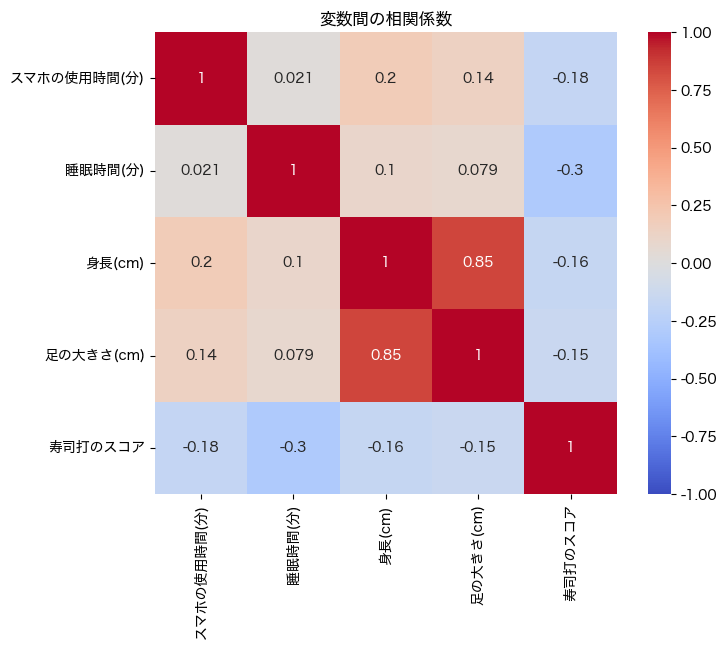

In [32]:
# 相関行列のヒートマップ
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot=True,  # 数値を表示
            cmap='coolwarm',  # カラーマップ
            center=0,  # 0を中心に
            vmin=-1, vmax=1,  # 範囲を-1から1に
            square=True)  # 正方形のセル
plt.title('変数間の相関係数')
plt.show()


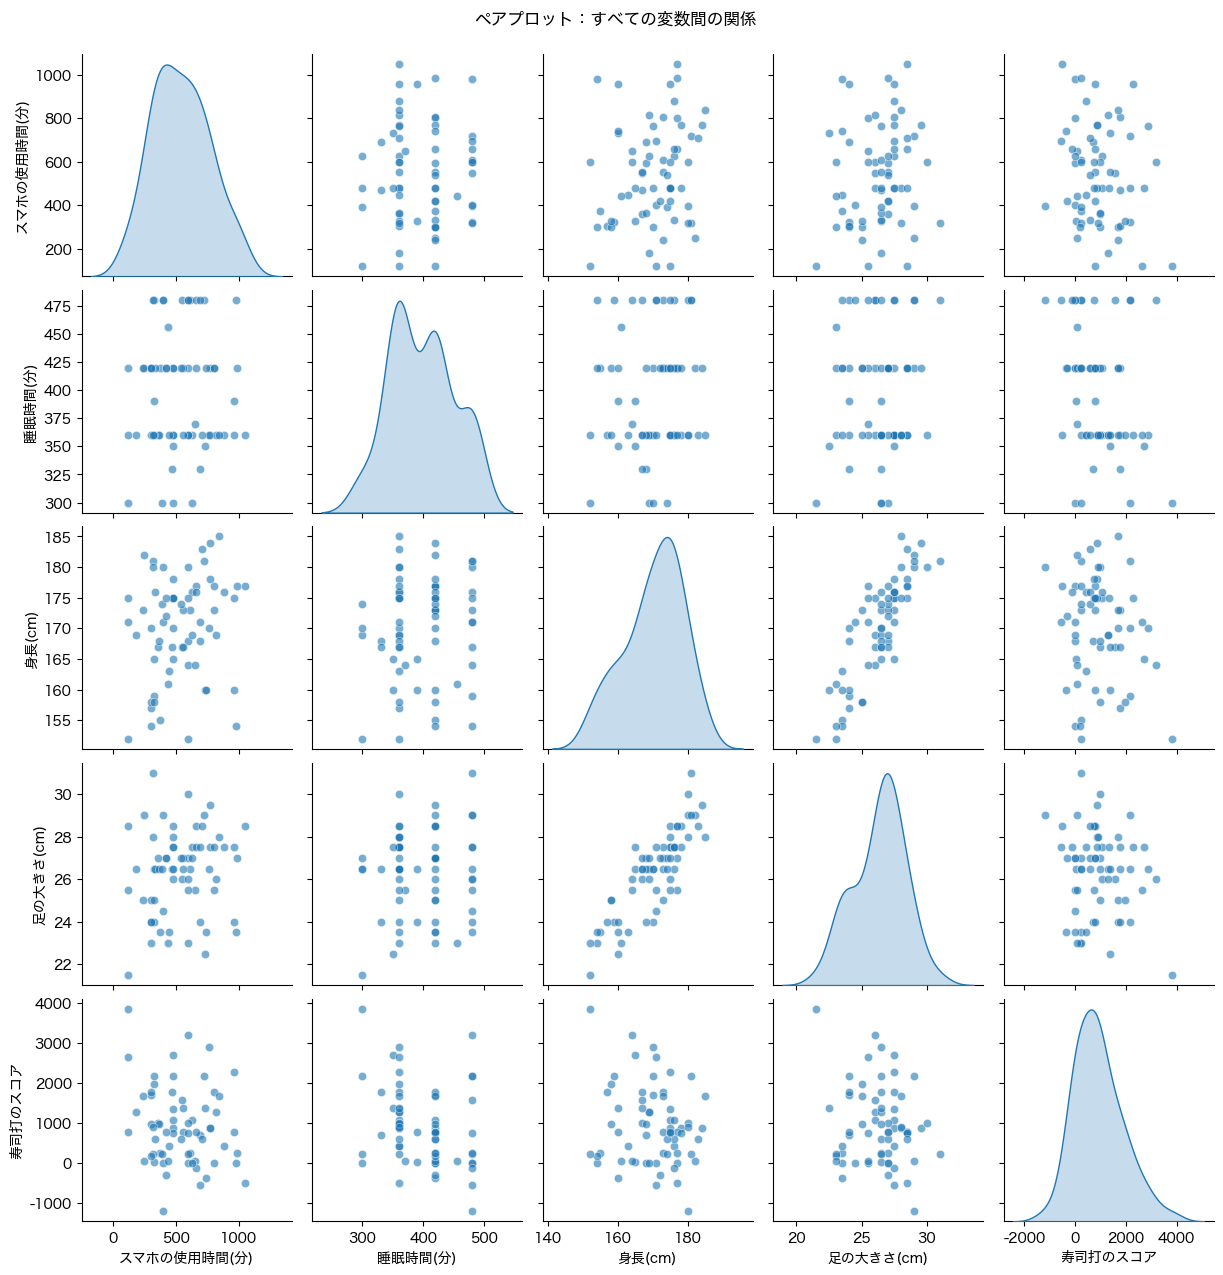

In [33]:
# すべての変数間の関係を一度に可視化
sns.pairplot(df_cleaned, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('ペアプロット：すべての変数間の関係', y=1.02)
plt.show()